In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.pandas.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv('US_Accidents_Dec21_updated.csv')

# Data preparation and Cleaning


In [15]:
df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [17]:
print(df.shape)

(2845342, 47)


In [22]:
df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [5]:
#percentage of missing values
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentages[missing_percentages!=0]

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
dtype: float64

<AxesSubplot:>

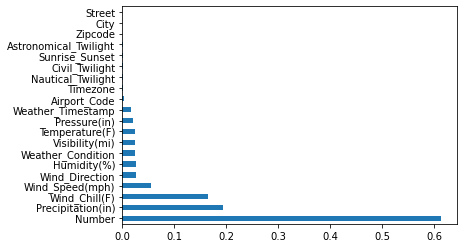

In [6]:
missing_percentages[missing_percentages!=0].plot(kind='barh')

In [23]:
#remove columns that we don't want to user since that column is missed for more percentage




# Exploratory Analysis and Visualization

In [ ]:
#select some of the columns and plot the graph to analyse the insights

In [7]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
#columns will analyse :
#City, Start time, Start_Lng, Start_Lat, Temperature, Weathercondition

In [9]:
cities=df.City.unique()
cities

array(['Dublin', 'Dayton', 'Cincinnati', ..., 'Clarksdale', 'Bridgeboro',
       'American Fork-Pleasant Grove'], dtype=object)

In [10]:
cities[:100]

array(['Dublin', 'Dayton', 'Cincinnati', 'Akron', 'Williamsburg',
       'Cleveland', 'Lima', 'Westerville', 'Jamestown', 'Freeport',
       'Columbus', 'Toledo', 'Roanoke', 'Ft Mitchell', 'Edinburgh',
       'Fairborn', 'Shelbyville', 'Greensburg', 'Saint Paul',
       'Parkersburg', 'Indianapolis', 'Dundee', 'Jeffersonville',
       'Pittsburgh', 'Lewis Center', 'Dunkirk', 'Redkey', 'Milton',
       'Willshire', 'Straughn', 'Cambridge Springs', 'Fremont',
       'Louisville', 'South Charleston', 'Edinboro', 'Buckhannon',
       'Lockbourne', 'Painesville', 'Washington', 'Dunbar', 'Angola',
       'Edon', 'Medina', 'De Mossville', 'New Albany', 'Charleston',
       'Fort Wayne', 'Burnsville', 'Bedford', 'Clarksville', 'Lakewood',
       'Richfield', 'Sewickley', 'Independence', 'Westlake', 'Erlanger',
       'Grove City', 'Monroe', 'West Middlesex', 'Gaston', 'Economy',
       'Fairmount', 'Hagerstown', 'Walton', 'Crittenden', 'Coraopolis',
       'Holland', 'Greenfield', 'Anderson', 

In [12]:
cities_by_accident=df.City.value_counts()
cities_by_accident

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

In [17]:
cities_by_accident[:10]

Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
Charlotte       33152
Sacramento      32559
San Diego       26627
Raleigh         22840
Minneapolis     22768
Name: City, dtype: int64

In [34]:
#check if a value exist

'New York' in df.City


False

<AxesSubplot:>

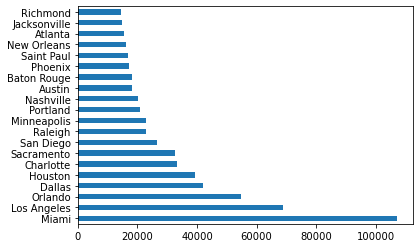

In [13]:
cities_by_accident[:20].plot(kind='barh')

In [14]:
import seaborn as sns
sns.set_style("darkgrid")

C:\Users\kcjc608\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

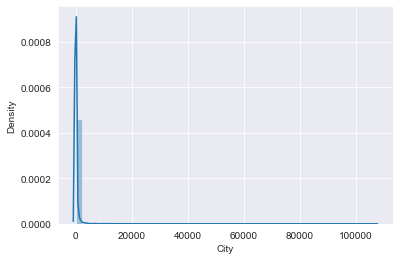

In [41]:
sns.distplot(cities_by_accident)

In [38]:
type(cities_by_accident)

pandas.core.series.Series

In [39]:
list(cities_by_accident)

[106966,
 68956,
 54691,
 41979,
 39448,
 33152,
 32559,
 26627,
 22840,
 22768,
 20944,
 20267,
 18301,
 18182,
 17143,
 16869,
 16251,
 15622,
 14967,
 14349,
 13799,
 13377,
 13310,
 13298,
 12044,
 11249,
 11188,
 10984,
 10709,
 10538,
 10502,
 10398,
 10345,
 10051,
 9885,
 9763,
 9624,
 9453,
 9335,
 9205,
 9025,
 8898,
 8896,
 8328,
 7960,
 7555,
 7543,
 7361,
 7344,
 7184,
 7068,
 7029,
 7021,
 6971,
 6951,
 6924,
 6908,
 6882,
 6862,
 6858,
 6421,
 6199,
 6145,
 6098,
 5930,
 5733,
 5579,
 5542,
 5258,
 5115,
 5092,
 4991,
 4704,
 4695,
 4694,
 4645,
 4585,
 4577,
 4543,
 4513,
 4510,
 4400,
 4299,
 4260,
 4179,
 4166,
 4149,
 4149,
 4138,
 4114,
 4075,
 4050,
 4041,
 4022,
 3979,
 3950,
 3925,
 3924,
 3898,
 3824,
 3726,
 3683,
 3634,
 3629,
 3611,
 3600,
 3562,
 3555,
 3542,
 3540,
 3537,
 3526,
 3514,
 3502,
 3476,
 3471,
 3466,
 3429,
 3408,
 3382,
 3362,
 3327,
 3302,
 3278,
 3268,
 3249,
 3210,
 3207,
 3200,
 3191,
 3185,
 3179,
 3177,
 3160,
 3128,
 3071,
 3050,
 3050,

In [15]:
high_accident_cities=cities_by_accident[cities_by_accident>=1000]
low_accident_cities=cities_by_accident[cities_by_accident<1000]

In [17]:
len(high_accident_cities)

496

In [44]:
len(low_accident_cities)

11185

In [47]:
len(high_accident_cities)/len(df.City)

0.00017431999387068408

In [48]:
percent=0.00017431999387068408*100
percent

0.01743199938706841

<AxesSubplot:xlabel='City', ylabel='Count'>

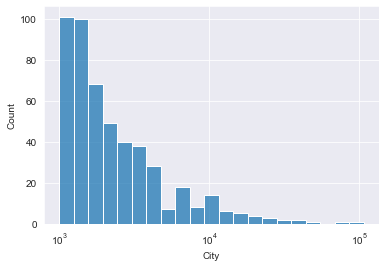

In [52]:
sns.histplot(high_accident_cities,log_scale=True)

C:\Users\kcjc608\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

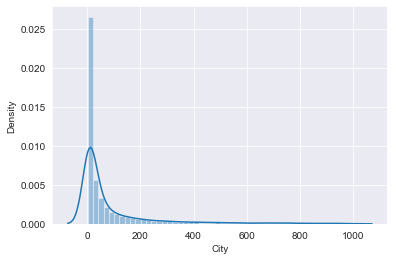

In [50]:
sns.distplot(low_accident_cities)

In [55]:
cities_by_accident[cities_by_accident==1]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

### Start time

In [56]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [18]:
pd.to_datetime(df.Start_Time)

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

In [19]:
df.Start_Time=pd.to_datetime(df.Start_Time)


In [20]:
type(df.Start_Time)

pandas.core.series.Series

In [62]:
df.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

In [23]:
df.Start_Time[0].hour

0

In [22]:
df.Start_Time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

In [67]:
df.Start_Time.hour

AttributeError: 'Series' object has no attribute 'hour'

C:\Users\kcjc608\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time', ylabel='Density'>

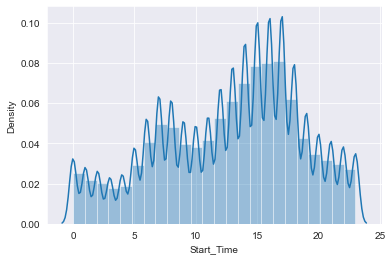

In [24]:
sns.distplot(df.Start_Time.dt.hour,bins=24)

In [ ]:
 #high percentage of accidents occur between 6 to 10 am.  (probably people in hurryr to get to work)
#next highest percentage is 3 to 6 pm evening. 

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

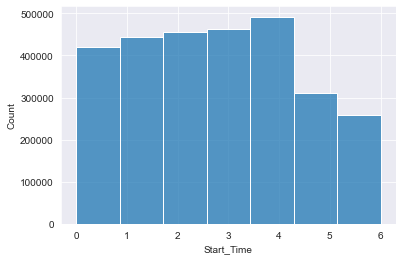

In [77]:
sns.histplot(df.Start_Time.dt.dayofweek,bins=7)

In [78]:
sundays_start_time=df.Start_Time[df.Start_Time.dt.dayofweek==6]
sundays_start_time

154       2016-02-14 03:58:33
155       2016-02-14 05:26:58
156       2016-02-14 16:30:40
157       2016-02-14 16:38:40
158       2016-02-14 17:40:17
                  ...        
2843129   2019-08-18 22:48:14
2843130   2019-08-18 23:24:10
2843243   2019-08-18 22:56:56
2843244   2019-08-18 22:56:56
2843282   2019-08-18 22:54:41
Name: Start_Time, Length: 259274, dtype: datetime64[ns]

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

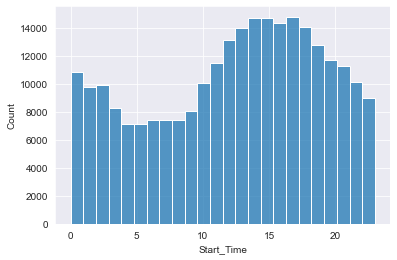

In [80]:
sns.histplot(sundays_start_time.dt.hour,bins=24)

In [81]:
mondays_start_time=df.Start_Time[df.Start_Time.dt.dayofweek==0]
mondays_start_time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2843321   2019-08-19 20:43:02
2843322   2019-08-19 20:41:30
2843675   2019-08-19 22:18:31
2843676   2019-08-19 22:21:28
2843677   2019-08-19 22:31:15
Name: Start_Time, Length: 419821, dtype: datetime64[ns]

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

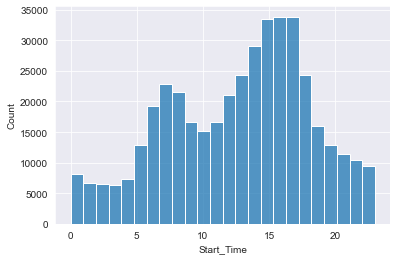

In [82]:
sns.histplot(mondays_start_time.dt.hour,bins=24)

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

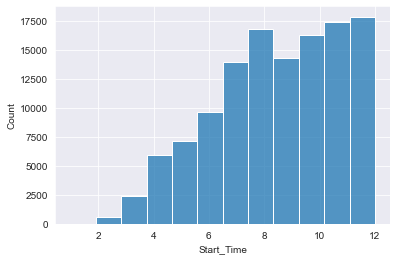

In [92]:
df_2019=df[df.Start_Time.dt.year==2016]
sns.histplot(df_2019.Start_Time.dt.month,bins=12)

In [95]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

# Latitude and Longitude

In [97]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [98]:
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

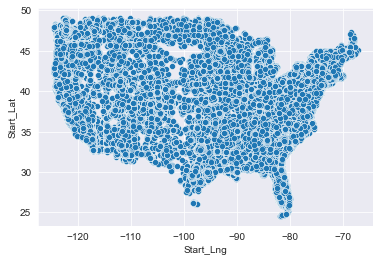

In [99]:
sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat)

In [18]:
#create 10 percentage sample data out of df
sample_df=df.sample(int(0.1*len(df)))

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

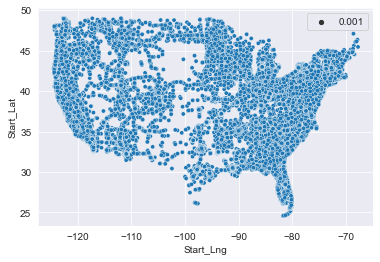

In [21]:
sns.scatterplot(x=sample_df.Start_Lng,y=sample_df.Start_Lat, size=0.001)

In [23]:
import folium

ModuleNotFoundError: No module named 'folium'

In [25]:
pip install folium

In [29]:
import folium
from folium.plugins import HeatMap

In [34]:
sample_df=df.sample(int(0.001*len(df)))
lat_lon_pairs=list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))

In [37]:
map=folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

# Insights

-No data from new york

-Number of accidents per city decreases exponentially

-Less than 1 % of cities have more than 1000 yearly accidents

-Over 1200 cities have reported just 1 accident (needs to investigate)

# Questions and Answers

1. Are there more accidents in warmer or colder areas ?
2. Which 5 states have the greatest number of accidents, How about per capita ?
3. Does New york show up in the data ? If yes, why is the count lower if this is the most populated city in us?
4. Among the top 100 cities in number of accidents, which states do they belong to most frequently ?
5. What time of the day are accidents most frequent ?
6. Which days of the week have more accidents ?
7. Which months have the more accidents ?
8. What is the trend of accidents year over year ?
9. When is accidents per unit of traffic the highest ?